### Objective:  
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.


Context:   
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.  

Data Description:   
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Data Dictionary:  
RowNumber: Row number.  
CustomerId: Unique identification key for different customers.  
Surname: Surname of the customer  
Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical   representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.  
Geography: The country to which the customer belongs.  
Gender: The gender of the customer.  
Age: Age of the customer.  
Tenure: The period of time a customer has been associated with the bank.  
Balance: The account balance (the amount of money deposited in the bank account) of the customer.  
NumOfProducts: How many accounts, bank account affiliated products the person has.  
HasCrCard: Does the customer have a credit card through the bank?  
IsActiveMember: Subjective, but for the concept  
EstimatedSalary: Estimated salary of the customer.  
Exited: Did they leave the bank after all?  

Points Distribution:  
The points distribution for this case is as follows:  

1. Read the dataset  
2. Drop the columns which are unique for all users like IDs (5 points)   
3. Perform bivariate analysis and give your insights from the same (5 points)   
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)  
5. Normalize the train and test data (10points)  
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)  
7. Predict the results using 0.5 as a threshold (10points)  
8. Print the Accuracy score and confusion matrix (5 points)  


In [1]:
# Importing generic libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 1. Read the dataset

In [2]:
bdf = pd.read_csv(r'bank.csv')

In [3]:
bdf.shape

(10000, 14)

In [4]:
bdf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bdf.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
bdf['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### Insights: 
Dataset has 10000 rows, and 14 columns  
20% of the data is from Churned Customers, acceptable balanced data


    

#### 2. Drop the columns which are unique for all users like IDs (5 points)

<AxesSubplot:>

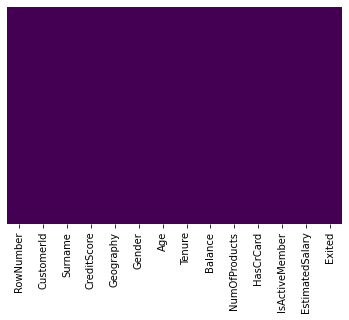

In [7]:
#Missing Value through data visualization
sns.heatmap(bdf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Insights: 
No missing values

In [8]:
bdf.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
# RowNumber, CustomerId have all user unique. Also Surname not neded for the model droping that too
bdf1 = bdf.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [10]:
bdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
bdf1.nunique() 

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [12]:
# To check duplicates in the dataframe
dupes =bdf1.duplicated()
dupes.sum()

0

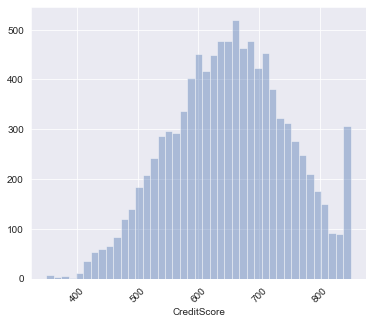

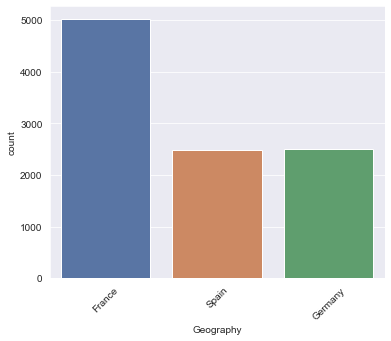

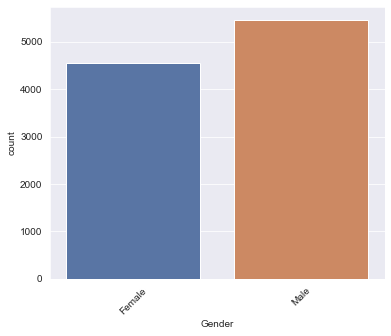

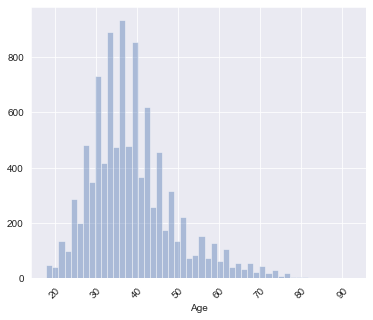

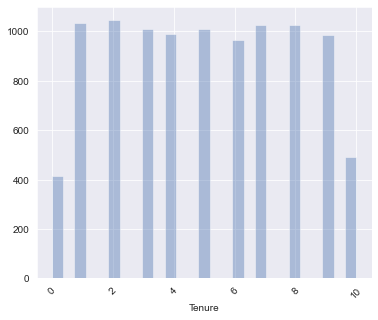

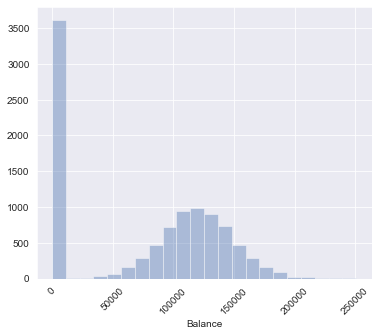

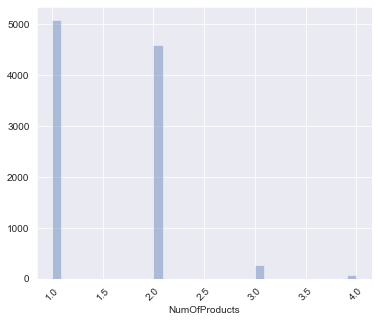

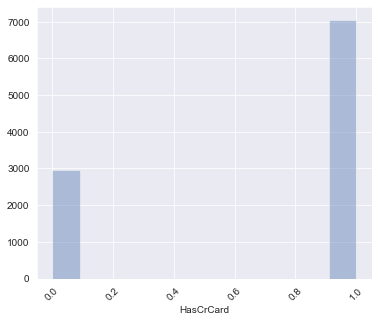

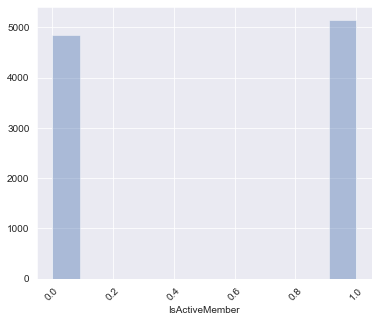

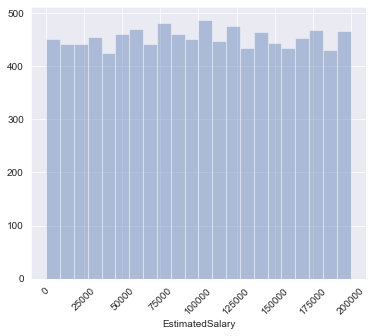

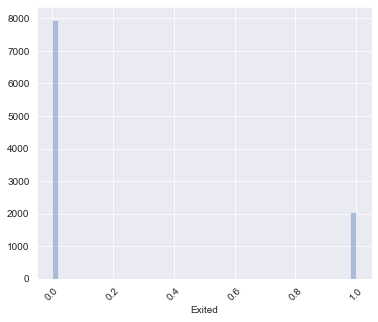

In [13]:
# Univariate Analysis
def geeplot(df):
    
    sns.set({'figure.figsize': (6,5)})

    for feature in df.columns: 
        if df[feature].dtype == 'object':
            (sns.countplot(df[feature]))
        else:
            (sns.distplot(df[feature],kde=False))
        plt.xticks(rotation=45)
        plt.show()
geeplot(bdf1)

#### In sights:   
The average credit score = 650 and the mean account balance of the customer = 97 k  
50% of the customer salary $100k 
Data is from three European countries. France has double size of customers than Spain and Germany  
~50% of the customers have one account and ~45% have 2 accounts  
~ 70% posess credit cards  
20% of the customers are churned  

#### 3. Perform bivariate analysis and give your insights from the same (5 points)

In [14]:
bdf2 = bdf.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [15]:
bdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [16]:
bdf2.Geography = pd.Categorical(bdf2.Geography).codes
bdf2.Gender = pd.Categorical(bdf2.Gender).codes

In [17]:
bdf2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


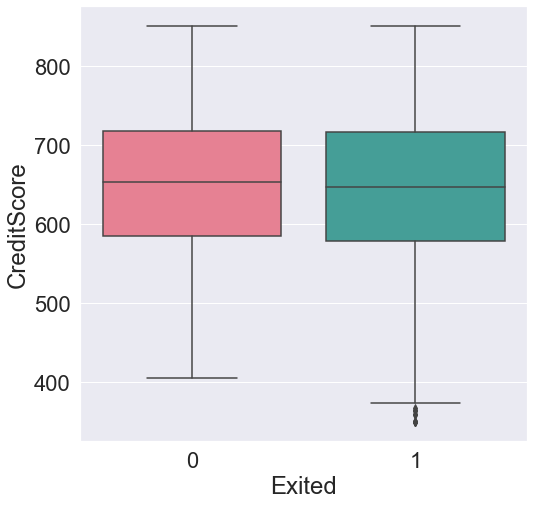

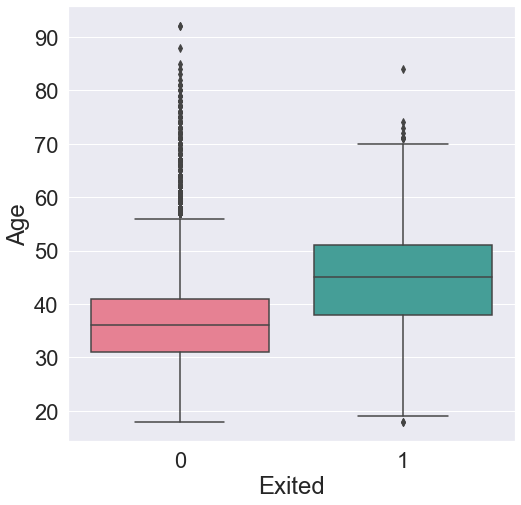

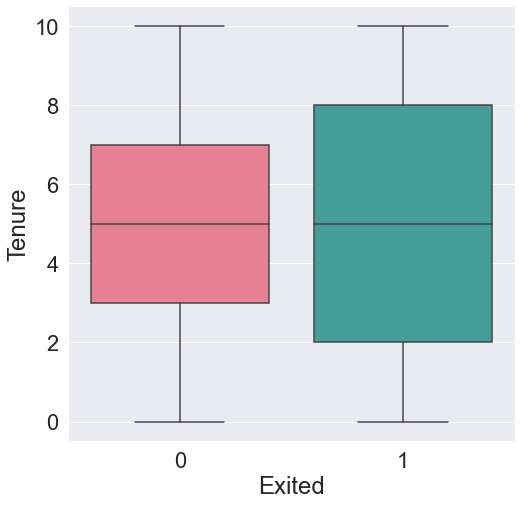

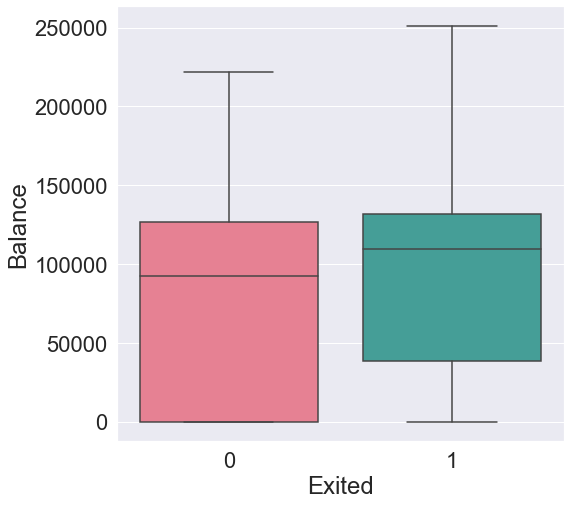

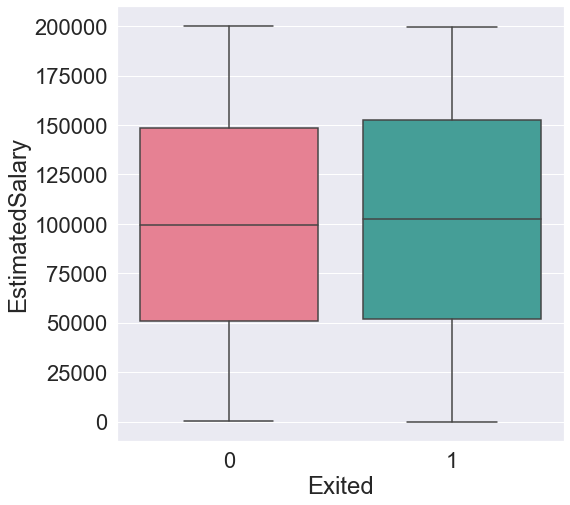

In [18]:
sns.set(font_scale = 2)
con_col = ['CreditScore', 'Age', 'Tenure','Balance','EstimatedSalary']

def bplot(i):
    plt.figure(figsize=(8,8))
    sns.boxplot(x=bdf1['Exited'], y=bdf1[i], palette="husl")
    plt.show()
    
for i in con_col:
    bplot(i)

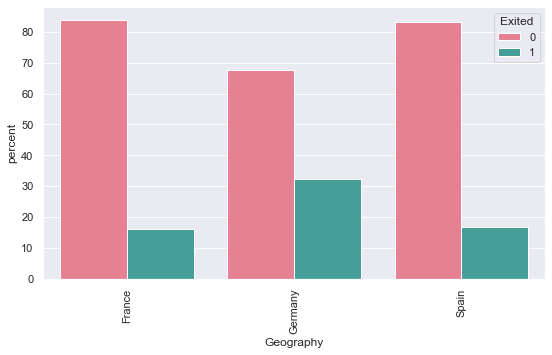

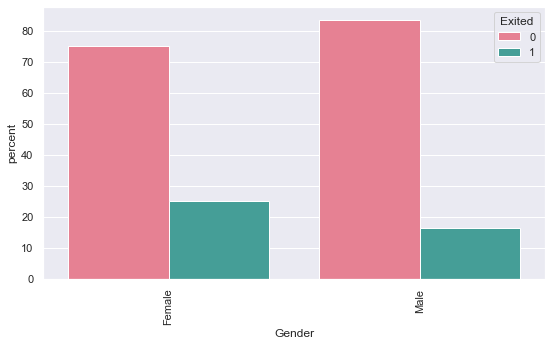

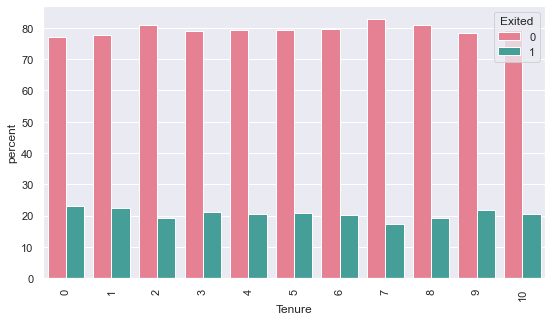

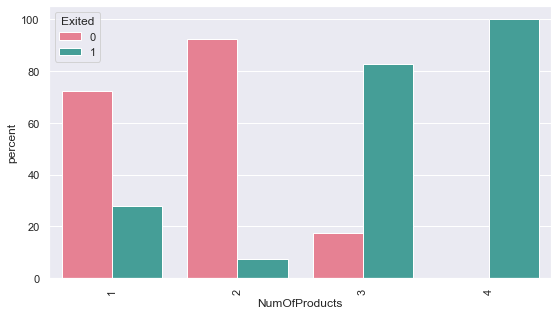

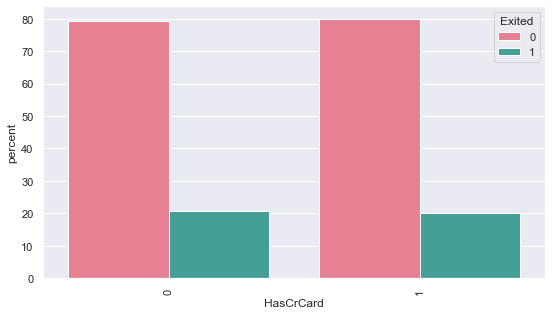

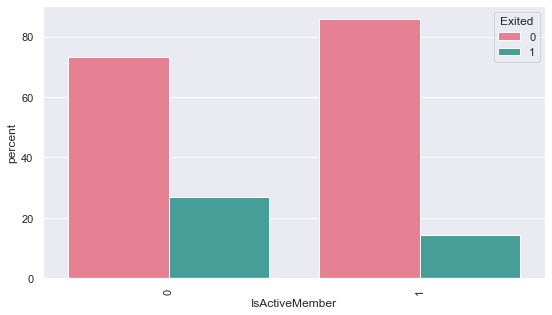

In [19]:
sns.set(font_scale = 2)
sns.set(rc={'figure.figsize':(9,5)}) #size of the plot
cat_col = ['Geography', 'Gender',  'Tenure', 'NumOfProducts','HasCrCard','IsActiveMember']
y = 'Exited'

for i in cat_col:
    pl_counts = (bdf1.groupby(i)[y]
                 .value_counts(normalize=True)
                 .mul(100)
                 .rename('percent')
                 .reset_index()
                 .sort_values('Exited'))
    p = sns.barplot(x=i, y='percent', hue='Exited', data=pl_counts,palette="husl")
    _ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
    
    plt.show()

<Figure size 14400x14400 with 0 Axes>

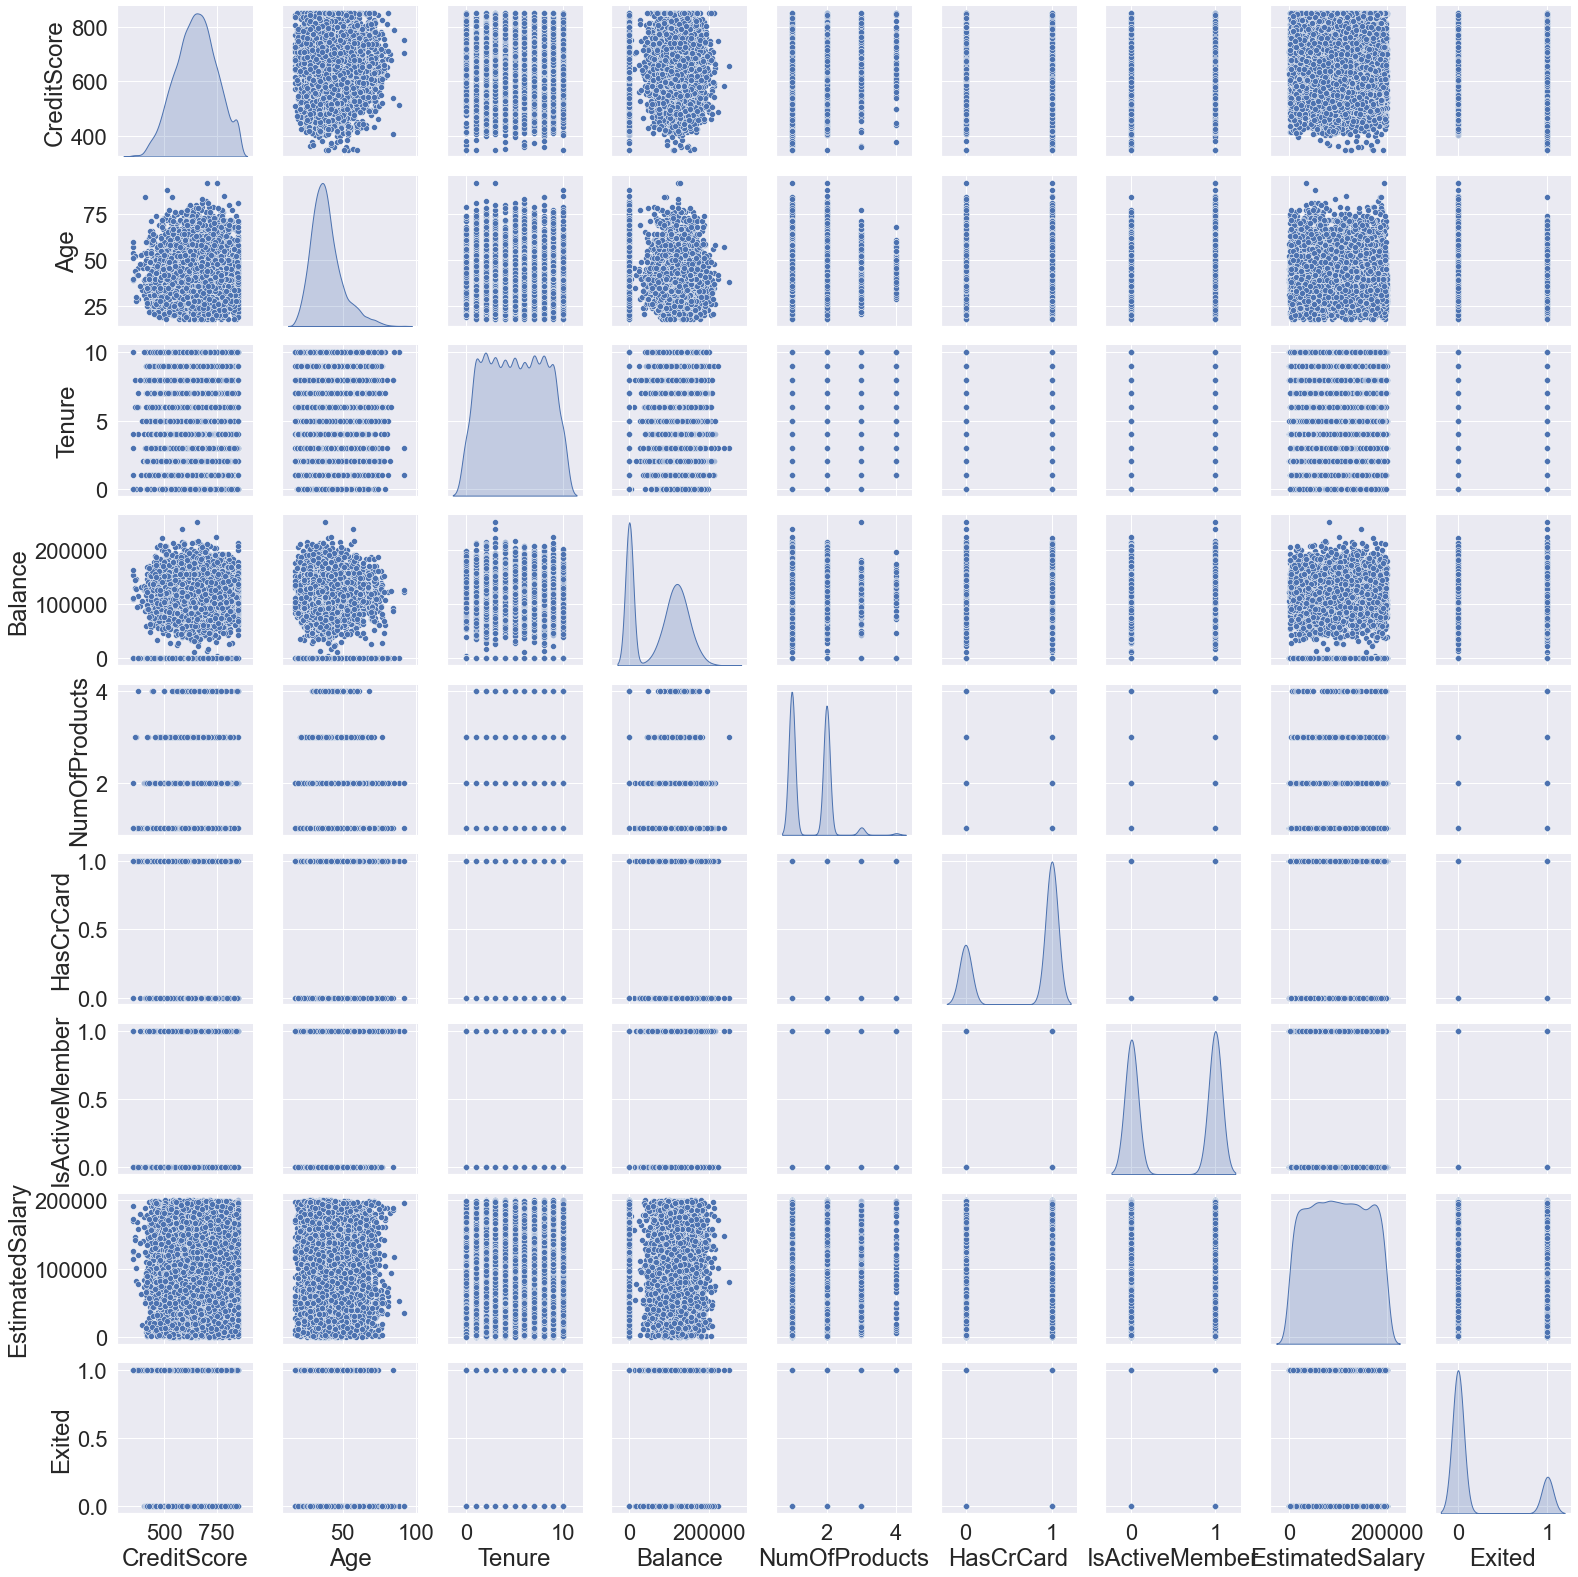

In [20]:
sns.set(font_scale = 2)
plt.figure(figsize=(200,200))

# Pairplot of scaled features  
sns.pairplot(bdf1,diag_kind='kde')
plt.show()

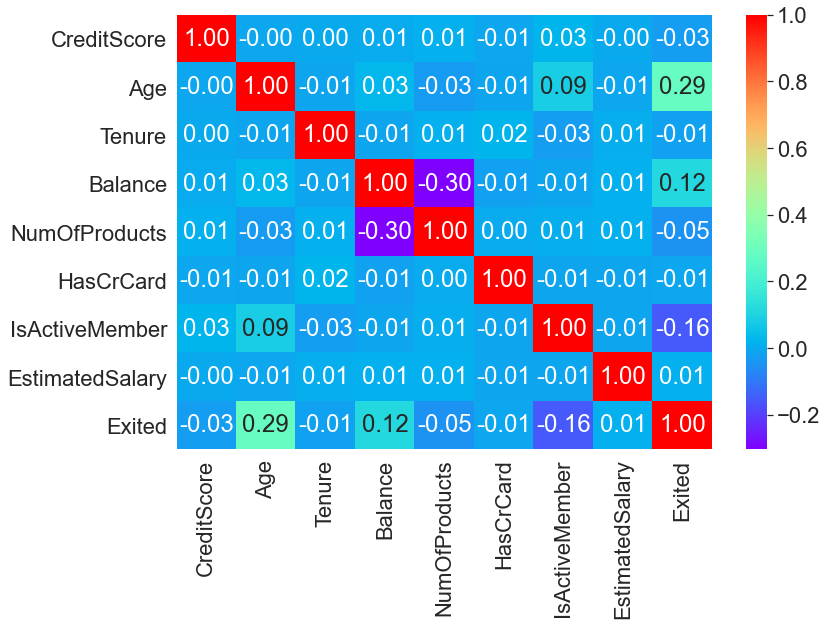

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(bdf1.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

#### Insights:
The average age of the customers who churn are above ~40 yrs old.  
In Germany, 1 in 3 customers churned  
Whereas in France and Spain 1 in 5 customers churned   
Female customers churn 10% more than male  
Customers who had multiple accounts (more than 2) churned at higher percent  
Customer age and their account balance shows a slight corelation with Churn

#### 4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)

In [22]:
# Drop RowNumber, CustomerId, Surname
bdf3 = bdf.drop(['RowNumber','CustomerId','Surname'], axis=1)
bdf3.Geography = pd.Categorical(bdf3.Geography).codes
bdf3.Gender = pd.Categorical(bdf3.Gender).codes


# Feature Set 
X = bdf3.drop(columns='Exited').astype('float32')
# Target Set
y = bdf3["Exited"].astype('float32')

In [23]:
# Converting into One-hot vectors using Keras
from keras.utils import to_categorical
y = to_categorical(y)

In [24]:
y[:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7,stratify=y)

In [27]:
X_train.shape

(8000, 10)

In [28]:
y_train.shape

(8000, 2)

#### 5. Normalize the train and test data (10points)

In [29]:
from sklearn.preprocessing import StandardScaler
Normalize = StandardScaler()

X_train = Normalize.fit_transform(X_train)
X_test = Normalize.fit_transform(X_test)

In [30]:
X_train[:5]

array([[-0.02918619,  1.5165141 ,  0.9123271 ,  1.523791  , -1.3797522 ,
         0.08067213, -0.9080326 , -1.5417368 ,  0.97019404,  1.4193705 ],
       [ 1.2527579 , -0.89903843, -1.0960981 , -0.37148616,  1.3932706 ,
        -1.2220504 , -0.9080326 , -1.5417368 ,  0.97019404, -1.2936552 ],
       [ 0.95294833, -0.89903843, -1.0960981 ,  0.6709162 ,  1.3932706 ,
        -1.2220504 , -0.9080326 ,  0.6486191 , -1.0307217 ,  0.23571625],
       [-0.5667756 , -0.89903843,  0.9123271 , -1.69818   , -0.3398686 ,
         2.1469512 ,  0.80483246, -1.5417368 ,  0.97019404,  1.6933697 ],
       [-0.5564374 , -0.89903843,  0.9123271 , -1.8877077 , -1.0331243 ,
        -1.2220504 ,  0.80483246,  0.6486191 ,  0.97019404, -0.15362087]],
      dtype=float32)

In [31]:
X_test[:5]

array([[ 0.94111496, -0.9133632 , -1.0955455 , -0.18866071,  0.6370326 ,
        -1.2412106 ,  0.8196954 ,  0.6359987 ,  0.9704368 ,  1.6257126 ],
       [ 1.0034071 , -0.9133632 , -1.0955455 , -0.18866071, -0.39154533,
        -1.2412106 ,  0.8196954 , -1.5723302 ,  0.9704368 ,  1.2209994 ],
       [ 0.32857552,  0.29799384,  0.91278726,  0.30047777, -0.7344047 ,
         0.6615383 ,  0.8196954 ,  0.6359987 , -1.0304638 , -1.5940025 ],
       [-1.5401889 , -0.9133632 , -1.0955455 ,  0.00699468,  1.3227513 ,
         0.6470775 , -0.9261947 , -1.5723302 , -1.0304638 ,  1.4123933 ],
       [ 1.6159465 ,  1.5093509 ,  0.91278726, -0.18866071, -0.04868602,
        -1.2412106 ,  0.8196954 ,  0.6359987 , -1.0304638 , -1.3766593 ]],
      dtype=float32)

#### 6. Initialize & build the model. Identify the points of improvement and implement the same. (20)

In [32]:
import tensorflow as tf

In [33]:
#Initialize Sequential model
model_1 = tf.keras.models.Sequential()

#Adding 1st dence layer
model_1.add(tf.keras.layers.Dense(6, activation='relu',input_shape=(10,)))

#Add 2nd hidden layer
model_1.add(tf.keras.layers.Dense(10, activation='sigmoid'))

#Adding OUTPUT layer
model_1.add(tf.keras.layers.Dense(2, activation='sigmoid'))

In [34]:
#Create optimizer with non-default learning rate
optimizer1 = tf.keras.optimizers.Adam(lr=0.001)


#Compile the model
model_1.compile(optimizer=optimizer1, loss='mse', metrics=['accuracy'])

In [35]:
model_1.fit(X_train,y_train,epochs=500, batch_size=100)

Epoch 1/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2229 - accuracy: 0.7395
Epoch 2/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.7962
Epoch 3/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1643 - accuracy: 0.7962
Epoch 4/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.7962
Epoch 5/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.7962
Epoch 6/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.7962
Epoch 7/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1531 - accuracy: 0.7962
Epoch 8/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.7962
Epoch 9/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.7962
Epoch 10/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1464 - accuracy: 0.7962
Epoch 11/

80/80 [==============================] - 0s 2ms/step - loss: 0.1229 - accuracy: 0.8410
Epoch 83/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1228 - accuracy: 0.8419
Epoch 84/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1228 - accuracy: 0.8407
Epoch 85/500
80/80 [==============================] - 0s 1ms/step - loss: 0.1227 - accuracy: 0.8406
Epoch 86/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.8407
Epoch 87/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.8406
Epoch 88/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.8413
Epoch 89/500
80/80 [==============================] - 0s 1ms/step - loss: 0.1227 - accuracy: 0.8395
Epoch 90/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.8410
Epoch 91/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.8413
Epoch 92/500


80/80 [==============================] - 0s 3ms/step - loss: 0.1192 - accuracy: 0.8480
Epoch 163/500
80/80 [==============================] - 0s 3ms/step - loss: 0.1190 - accuracy: 0.8482: 0s - loss: 0.1187 - accuracy: 0.
Epoch 164/500
80/80 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.8487: 0s - loss: 0.1224 - accuracy: 
Epoch 165/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.8489
Epoch 166/500
80/80 [==============================] - 0s 3ms/step - loss: 0.1186 - accuracy: 0.8481
Epoch 167/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.8490
Epoch 168/500
80/80 [==============================] - 0s 3ms/step - loss: 0.1182 - accuracy: 0.8491: 0s - loss: 0.1172 - accuracy: 0.
Epoch 169/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.8495
Epoch 170/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1178 - accuracy: 0.8493
Epoch

80/80 [==============================] - 0s 2ms/step - loss: 0.1048 - accuracy: 0.8625
Epoch 242/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.8629
Epoch 243/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.8635
Epoch 244/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.8635
Epoch 245/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.8626
Epoch 246/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.8634
Epoch 247/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.8636
Epoch 248/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.8633
Epoch 249/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 0.8637
Epoch 250/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1044 - accuracy: 0.8625
Epoc

80/80 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.8618
Epoch 322/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.8630
Epoch 323/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.8633
Epoch 324/500
80/80 [==============================] - 0s 1ms/step - loss: 0.1030 - accuracy: 0.8635
Epoch 325/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1030 - accuracy: 0.8635
Epoch 326/500
80/80 [==============================] - 0s 1ms/step - loss: 0.1029 - accuracy: 0.8621
Epoch 327/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.8619
Epoch 328/500
80/80 [==============================] - 0s 4ms/step - loss: 0.1030 - accuracy: 0.8633
Epoch 329/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.8625
Epoch 330/500
80/80 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.8639
Epoc

80/80 [==============================] - 0s 3ms/step - loss: 0.1024 - accuracy: 0.8666
Epoch 402/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.8659
Epoch 403/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.8655
Epoch 404/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.8662
Epoch 405/500
80/80 [==============================] - 0s 3ms/step - loss: 0.1023 - accuracy: 0.8665
Epoch 406/500
80/80 [==============================] - 0s 3ms/step - loss: 0.1023 - accuracy: 0.8661
Epoch 407/500
80/80 [==============================] - 0s 3ms/step - loss: 0.1024 - accuracy: 0.8665
Epoch 408/500
80/80 [==============================] - 0s 3ms/step - loss: 0.1023 - accuracy: 0.8660
Epoch 409/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1023 - accuracy: 0.8664
Epoch 410/500
80/80 [==============================] - 0s 3ms/step - loss: 0.1023 - accuracy: 0.8661
Epoc

80/80 [==============================] - 0s 1ms/step - loss: 0.1020 - accuracy: 0.8674
Epoch 481/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.8661
Epoch 482/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.8666
Epoch 483/500
80/80 [==============================] - 0s 1ms/step - loss: 0.1020 - accuracy: 0.8666
Epoch 484/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.8674
Epoch 485/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.8670
Epoch 486/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.8679
Epoch 487/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.8661
Epoch 488/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.8669
Epoch 489/500
80/80 [==============================] - 0s 3ms/step - loss: 0.1019 - accuracy: 0.8664
Epoc

#### 7. Predict the results using 0.5 as a threshold (10points)

In [36]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [37]:
y_test_predict = model_1.predict(X_test)
y_test_predict = y_test_predict.argmax(axis=1)

In [38]:
y_test_predict = (model_1.predict_proba(X_test)[:,1] >= 0.5).astype('float32')

Instructions for updating:
Please use `model.predict()` instead.


In [39]:
y_test_predict

array([0., 0., 0., ..., 0., 1., 0.], dtype=float32)

#### 8. Print the Accuracy score and confusion matrix (5 points)

In [40]:
y_test = y_test.argmax(axis=1)

In [41]:
y_test

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [42]:
accuracy = accuracy_score(y_test,y_test_predict)

In [43]:
print("The test accuracy percentage is :", accuracy*100 )

The test accuracy percentage is : 85.85000000000001


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_predict)

array([[1532,   61],
       [ 222,  185]], dtype=int64)

In [45]:
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt= '.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

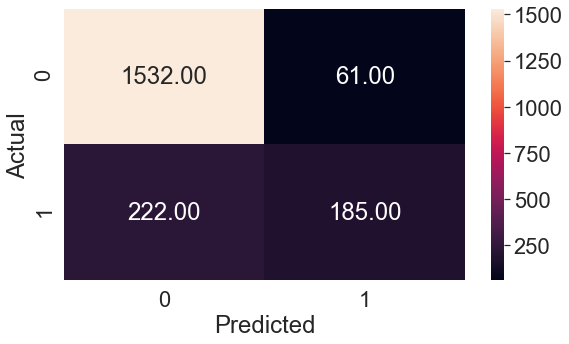

In [46]:
draw_cm(y_test, y_test_predict)

In [47]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
accuracy = accuracy_score(y_test, y_test_predict)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_test_predict)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_test_predict)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_test_predict)
print('F1 score: %f' % f1)

Accuracy: 0.858500
Precision: 0.752033
Recall: 0.454545
F1 score: 0.566616
